# CAP curve

The CAP curve is a tool to graphically assess the quality of the classification algorithm. Actually, just like ROC curve, which is much more popular in modern machine learning. I haven't found any advantages of using CAP curve instead of ROC curve (ROC doesn't have any advantages either). But you can face it if you are dealing with old literature or specific field, so this page may be useful for you.

Sources:

- https://en.wikipedia.org/wiki/Cumulative_accuracy_profile - wikipedia page on the CAP curve;
- https://medium.com/geekculture/classification-model-performance-evaluation-using-auc-roc-and-cap-curves-66a1b3fc0480 - simple article with examples on `python3`.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, auc

from statsmodels.distributions.empirical_distribution import ECDF

## Content

1. [CAP curve definition](#1);
2. [Ideal CAP curve](#2);
3. [Random CAP curve](#3);
4. [$TPR$ on the ordinate axis at the CAP curve](#TPR_CAP).

<a id="1"></a>
# CAP curve definition

**CAP curve** represents the cumulative number of positive outcomes on the ordinate axis relative to the corresponding cumulative number of the classifying parameter on the abscissa axis.

### Basic understanding of CAP curve by example

**For example**, let some model predict the probabilities $\hat{p}_i$ that $y_i=1$ (the $i$-th client has a positive outcome, manifestation of a trait). Suppose we have 5 observations in the test sample, we have predictions for them and a real class:

| $\hat{p}_i$ | $$y_i$$ |
| ----------- | ----- |
|     0.2     |   1   |
|     0.6     |   0   |
|     0.8     |   1   |
|     0.7     |   1   |
|     0.4     |   0   |


In order to construct a CAP curve we need to:

1. Sort the observations by decreasing $\hat{p}_i$;

| $\hat{p}_i$ | $$y_i$$ |
| ----------- | ----- |
|     0.8     |   1   |
|     0.7     |   1   |
|     0.6     |   0   |
|     0.4     |   0   |
|     0.2     |   1   |

2. Number each observation starting from 1;


|$i$| $\hat{p}_i$ | $$y_i$$ |
|-| ----------- | ----- |
|1|     0.8     |   1   |
|2|     0.7     |   1   |
|3|     0.6     |   0   |
|4|     0.4     |   0   |
|5|     0.2     |   1   |

3. Calculate the cumulative sum $y_i$ ($\hat{S}_{\hat{y}}$);

|$i$| $\hat{p}_i$ | $$y_i$$ |$$\hat{S}_{\hat{y}}$$|
|-| ----------- | ----- |---------------------|
|1|     0.8     |   1   |   1                 |
|2|     0.7     |   1   |   2                 |
|3|     0.6     |   0   |   2                 |
|4|     0.4     |   0   |   2                 |
|5|     0.2     |   1   |   3                 |

Starting at point (0,0) and continuing with the variables $i$ and $\hat{S}_{\hat{y}}$, a CAP curve is plotted.

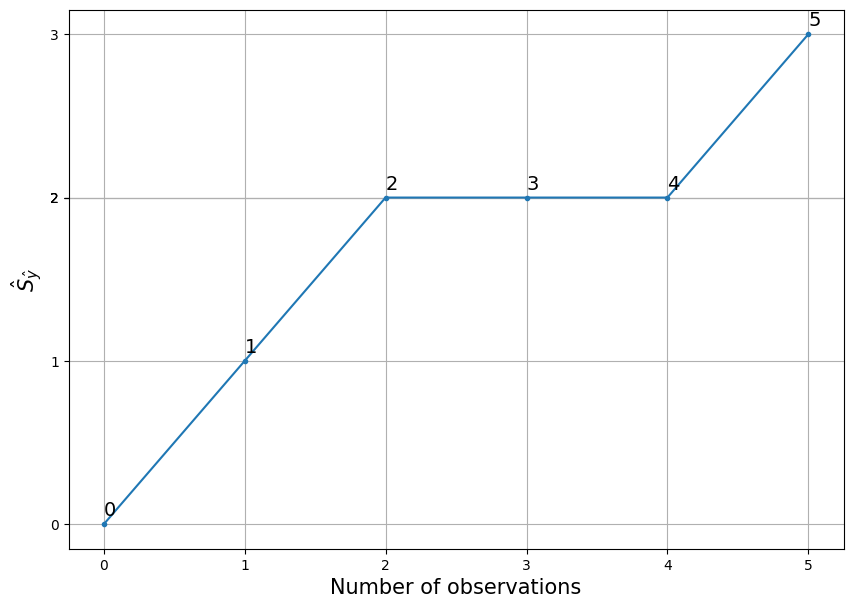

In [3]:
plt.figure(figsize = [10,7])

x = list(range(6))
y = [0,1,2,2,2,3]

plt.plot(x, y, marker = ".")

plt.xlabel("Number of observations", fontsize = 15)
plt.ylabel("$\hat{S}_{\hat{y}}$", fontsize = 15)

for x_val, y_val in zip(x, y):
    plt.text(x_val, y_val + 0.05, x_val, fontsize = 14)

plt.yticks(y)
plt.grid()

Interpretation for $i$-th point is: in $i$ worthest, according to the model, the observations are $\hat{S}_{\hat{y}_i}$ manifestations of the trait. Or for each point from the example:

1. In the 1 worst, according to the model, observations lie 1 manifestations of the trait;
1. In the 2 worst observations, according to the model, there are 2 manifestations of the trait;
1. In the 3 worst, according to the model, observations lie 2 manifestations of the trait;
1. In the 4 worst, according to the model, observations lie 2 manifestations of the trait;
1. In the 5 worst, according to the model, observations lie 3 manifestations of the trait.

### Relative CAP curve

If on the abscissa axis we plot not the number of observations $i$ but $i/n$ (where $n$ is the number of observations on which the CUP curve is calculated) and on the ordinate axis we plot not the cumulative sum but the cumulative percentage (the value coinciding with $TPR$, [detail](#TPR_CAP)), then we get what I call a *relative CAP* curve, the same in shape but bounded in the unit square:
<a id="last_tab_example"></a>

|$i$| $\hat{p}_i$  | $$y_i$$ |$$\hat{S}_{\hat{y}}$$|$$i/n$$|$$TPR_i$$|
|---| ------------ | ------- |---------------------|-------|---------|
| 1 |     0.8      |    1    |        1            |  0.2  |   1/3   |
| 2 |     0.7      |    1    |        2            |  0.4  |   2/3   |
| 3 |     0.6      |    0    |        2            |  0.6  |   2/3   |
| 4 |     0.4      |    0    |        2            |  0.8  |   2/3   |
| 5 |     0.2      |    1    |        3            |   1   |    1    |

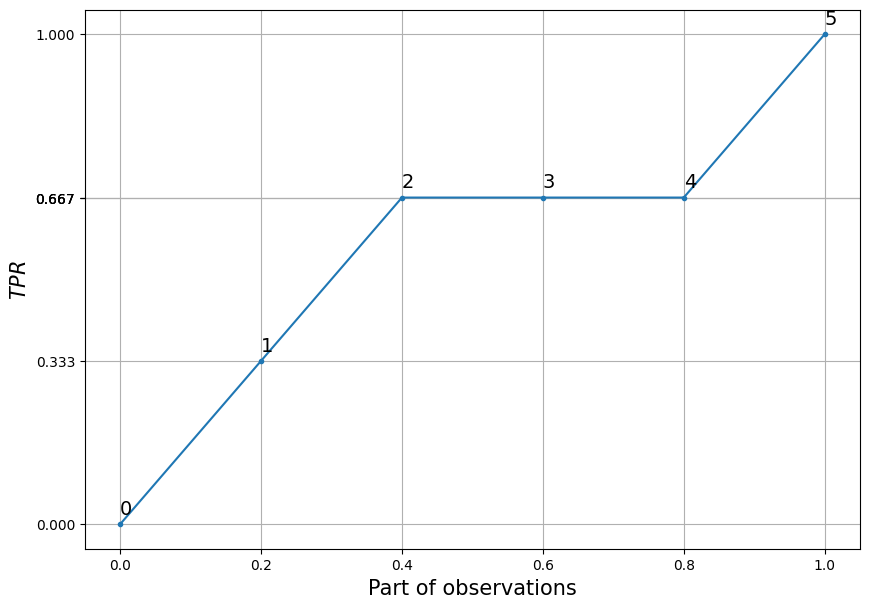

In [5]:
plt.figure(figsize = [10,7])

y_rel = [0, 1/3, 2/3, 2/3, 2/3, 1]
x_rel = [i/5 for i in range(6)]

plt.plot(
    x_rel, y_rel, marker = "."
)

plt.xlabel("Part of observations", fontsize = 15)

plt.ylabel("$TPR$", fontsize = 15)

for i, (x_val, y_val) in enumerate(zip(x_rel, y_rel)):
    plt.text(x_val, y_val + 0.02, i, fontsize = 14)
    
plt.yticks(y_rel)
plt.grid()

The interpretation of the $i$th point would be as follows: in $i/n*100\\%$ of the worst observations, according to the model, there are $TPR_i*100\%$ manifestations of the trait. Or for each point in the example under consideration:

1. The 0% worst observations, according to the model, contain 0% of the manifestations of the trait;
1. In 20% of the worst observations, according to the model, lies 33% of the manifestations of the trait;
1. In the 40% worst observations, according to the model, lies 67% of the manifestations of the trait;
1. In the 60% worst observations, according to the model, lies 67% of the manifestations of the trait;
1. In the 80% worst observations, according to the model, lies 67% of the manifestations of the trait;
1. In the 100% worst observations, according to the model, lies 100% of the manifestations of the trait.

**Further, by default, the relative CAP curve will be discussed, because I find it more applicable.**

<a id="2"></a>
# Идеальная CAP кривая

Играет важную роль в понимании механизма CAP кривой.


### Описание

Идеальный классификатор обладает следующим совойсвом - он из входной комбинации переменных, отписывающих наблюдение, $X_i$ может сделать такую дискриминирующую переменную $p_i$, чтобы:

$$y_i=1,y_j=0 \Rightarrow p_i>p_j; \forall i,j; i\neq j$$

То есть для любых двух наблюдений ($i$-го и $j$-го) если одно имеет проявление признака а другое нет, то предсказание для перовго должно быть больше.

В таких условиях, после сортировки по убыванию, все наблюдения с проявлением признака окажуться выше чем все наблюдения без проялвения признака. Следовательно CAP кривая будет расти только в начале, пока идут только наблюдения с проявлением признака. Так пока она не достигнет 1 - в точке соответсвующей самому низкому предсказанию для наблюдения с проявлением признака. Затем будет неизменна для всех наблюдений без проявления признака.

### Демонстрация на примере

Возвращаясь к примеру из прошлого раздела, [последняя рассмотренная таблица](#last_tab_example), в случае идеального классификатора должна была бы быть отсортирована так:

|$i$| $\hat{p}_i$  | $$y_i$$ |$$\hat{S}_{\hat{y}}$$|$$i/n$$|$$TPR$$|
|---| ------------ | ------- |---------------------|-------|-------|
| 1 |     0.8      |    1    |        1            |  0.2  |  1/3  |
| 2 |     0.7      |    1    |        2            |  0.4  |  2/3  |
| 3 |     0.2      |    1    |        2            |  0.6  |   1   |
| 4 |     0.6      |    0    |        2            |  0.8  |   1   |
| 5 |     0.4      |    0    |        3            |   1   |   1   |

Все наблюдения с $y_i=1$ выше нежели наблюдения для которых $y_i=0$.<br>
Добавим идеальную CAP кривую к прошлому графику.

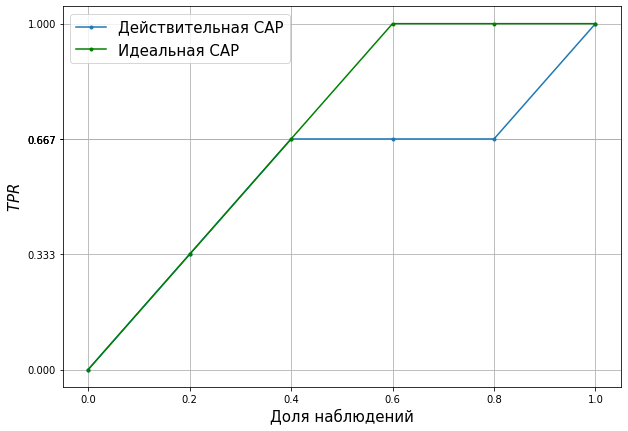

In [51]:
plt.figure(figsize = [10,7])

y_rel = [0, 1/3, 2/3, 2/3, 2/3, 1]
y_rel_ideal = [0, 1/3, 2/3, 1, 1, 1]
x_rel = [i/5 for i in range(6)]

plt.plot(x_rel, y_rel, marker = ".")
plt.plot(x_rel, y_rel_ideal, marker = ".", color = "green")

plt.xlabel("Доля наблюдений", fontsize = 15)
plt.ylabel("$TPR$", fontsize = 15)

plt.legend(
    ["Действительная CAP", "Идеальная CAP"],
    fontsize = 15
)

plt.yticks(y_rel)
plt.grid()

<a id="3"></a>
# Случайная CAP кривая

Вместе с идеальной исползуется для понимания насколько хороша или плоха та или иная модель.

### Описание

Из рассуждений, предложенных выше, становиться понятно, что чем быстрее CUP кривая растет в начале, тем лучше оциниваемый классификатор. Понятно, что случайный классификатор будет образовывать CAP которая приростает равномерно на любой области доли рассмотренных наблюдений. Потому, в случае генеральной совокупности, это будет просто прямая протянутая от точки (0,0) до точки (1,1). В случае выборки это будет кривая с очень близкими (или, в некоторых случаях, совпадающими) характеристиками.

### Вычислительный эксперимент

Рассмотрим вычислительный эксперимент: сэмитируем случайный классификатор и постоим для него CAP.

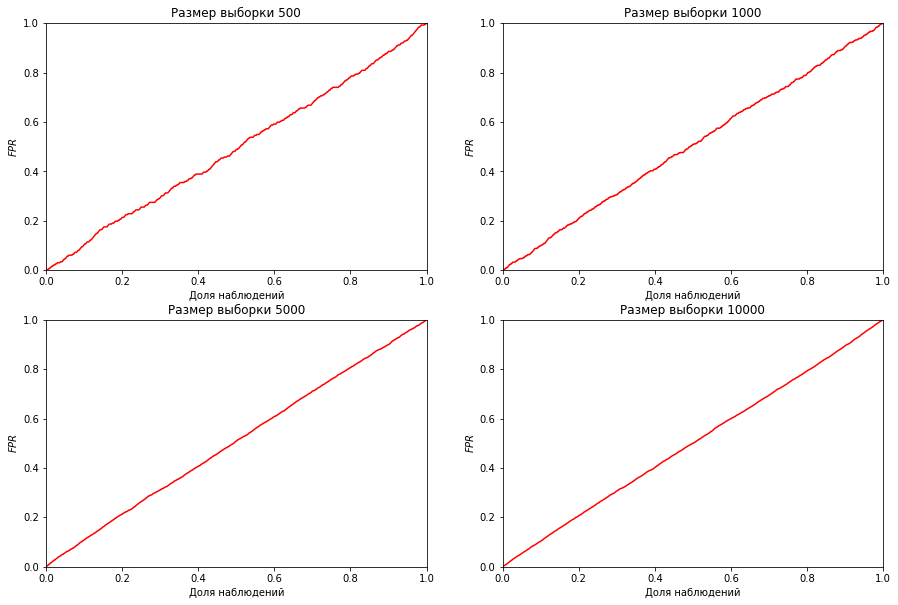

In [73]:
def plot_random_CAP(sample_size):
    experimental_sample = pd.DataFrame({
        "p_hat" : np.random.rand(sample_size),
        "y" : np.random.choice([0,1], sample_size)
    })

    experimental_sample.sort_values(
        "p_hat", ascending = False,
        inplace = True
    )

    experimental_sample["$$\hat{F}_{\hat{y}}$$"] = ECDF(
        1 - experimental_sample.query("y == 1")["p_hat"]
    )(1 - experimental_sample["p_hat"])
    experimental_sample.head()

    experimental_sample["$i$"] = range(1, sample_size + 1)
    experimental_sample["$i/n$"] = experimental_sample["$i$"]/sample_size

    plt.plot(
        experimental_sample["$i/n$"], 
        experimental_sample["$$\hat{F}_{\hat{y}}$$"],
        color = "red"
    )
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("Доля наблюдений")
    plt.ylabel("$FPR$")
    
    
sample_sizes = [500, 1000, 5000, 10000]
plt.figure(figsize = [15, 10])
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title("Размер выборки " + str(sample_sizes[i]))
    plot_random_CAP(sample_sizes[i])

Видно, что такая кривая дейсвительно стремиться к диагональной прямой с увеличением объема выборки. Потому, в прикладных исследованиях, ее принимают равной диагональной прямой.

### Дополняя пример прошлого раздела

Тогда полный CAP график, для рассмотренного примера, примет вид:

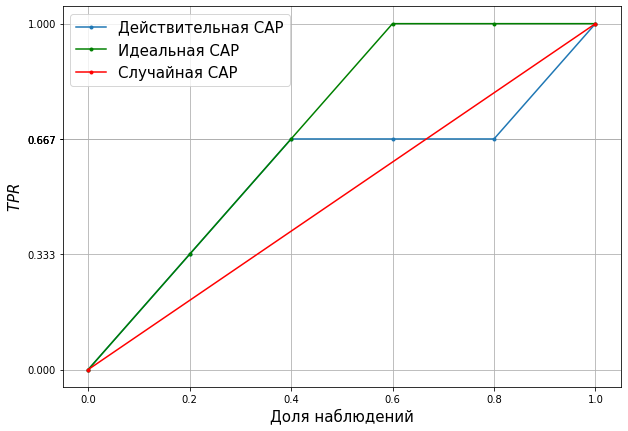

In [52]:
plt.figure(figsize = [10,7])

y_rel = [0, 1/3, 2/3, 2/3, 2/3, 1]
y_rel_ideal = [0, 1/3, 2/3, 1, 1, 1]
x_rel = [i/5 for i in range(6)]

plt.plot(x_rel, y_rel, marker = ".")
plt.plot(
    x_rel, y_rel_ideal, 
    marker = ".", color = "green"
)
plt.plot(
    [0,1], [0,1],
    color = "red", marker = "."
)

plt.xlabel("Доля наблюдений", fontsize = 15)
plt.ylabel("$TPR$", fontsize = 15)

plt.legend(
    [
        "Действительная CAP", 
        "Идеальная CAP",
        "Случайная CAP"
    ],
    fontsize = 15
)

plt.yticks(y_rel)
plt.grid()

<a id="TPR_CAP"></a>
# $TPR$ на оси ординат у CAP

$TPR$ это доля правильно предсказнных наблюдений проявлений признака при точке отсчения $p'$:

$$TPR_i(p')=\sum_{i=1}^n\frac{I(\hat{p}_i \geq p')}{n};$$

$$I(\hat{p}_i \geq p')=\begin{cases}
    1, \hat{p}_i \geq p';\\
    0, \text{в противном случае}.
\end{cases}$$

Эта величина и будет на оси ординат CAP-кривой.

### Проверка на примере

Весьма условноая вроверка, но все же, рассчитаем $TPR$ как мы считали для CAP кривой и получим его используя `sklearn.metrics.roc_curve` и сравнить.

In [92]:
from sklearn.metrics import roc_curve

np.random.seed(10)

sample_size = 200


test_df = pd.DataFrame({
    "p_hat" : np.random.rand(sample_size),
    "y" : np.random.choice([0,1], sample_size)
})

# подсчет подобно тому как мы слитали для CAP
CAT_TPR = np.concatenate([
    [0],# для нулевой точки отсечния нужно добачить 0
    np.sort(
        ECDF(1 - test_df.query('y == 1')["p_hat"])\
        (1 - test_df["p_hat"])
    )
])

# вычисление используя, которвый инструмент
fpr, tpr, t = roc_curve(
    test_df["y"],
    test_df["p_hat"],
    drop_intermediate = False
)

# сравнение - c точностью до 4-ех знаков после запятой
all(np.round(CAT_TPR,4) == np.round(tpr,4))

True

Все верно - величины совпадают.